#GOLD PRICE_EDA



IMPORTING LIBRARIES



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA


IMPORTING DATASET

In [2]:
df=pd.read_csv("/content/gld_price_data.csv")

In [3]:
df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [5]:
# SPX - The Standard and Poor's 500, or simply the S&P 500, is a stock market index tracking the performance of 500 large companies listed on stock exchanges in the United States.
# GLD - SPDR Gold Shares is part of the SPDR family of exchange-traded funds (ETF) managed and marketed by State Street Global Advisors.
# USO - The United States Oil Fund ® LP (USO) is an exchange-traded security whose shares may be purchased and sold on the NYSE Arca.
# SLV - The iShares Silver Trust (SLV) is an exchange traded fund (ETF) that tracks the price performance of the underlying holdings in the LMBA Silver Price.
# EUR/USD - The Currency Pair EUR/USD is the shortened term for the euro against U.S. dollar pair, or cross for the currencies of the European Union (EU) and the United States (USD). The value of the EUR/USD pair is quoted as 1 euro per x U.S. dollars. For example, if the pair is trading at 1.50, it means it takes 1.5 U.S. dollars to buy 1 euro.


In [6]:
# finding null values
df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
# finding shape of the dataset
df.shape

(2290, 6)

In [8]:
# Data Stats

df.describe().T

,count,mean,std,min,25%,50%,75%,max
SPX,2290.0,1654.315776,519.111540,676.530029,1239.874969,1551.434998,2073.010070,2872.870117
GLD,2290.0,122.732875,23.283346,70.000000,109.725000,120.580002,132.840004,184.589996
USO,2290.0,31.842221,19.523517,7.960000,14.380000,33.869999,37.827501,117.480003
SLV,2290.0,20.084997,7.092566,8.850000,15.570000,17.268500,22.882500,47.259998
EUR/USD,2290.0,1.283653,0.131547,1.039047,1.171313,1.303297,1.369971,1.598798


In [9]:
# Finding correlation

df1 = df.drop("Date",axis=1).corr()

In [10]:
df1

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


In [11]:
df1["GLD"]

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

DATA VISUALIZATION

<ipython-input-12-b1d1ee3b310c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["GLD"],color="Green")


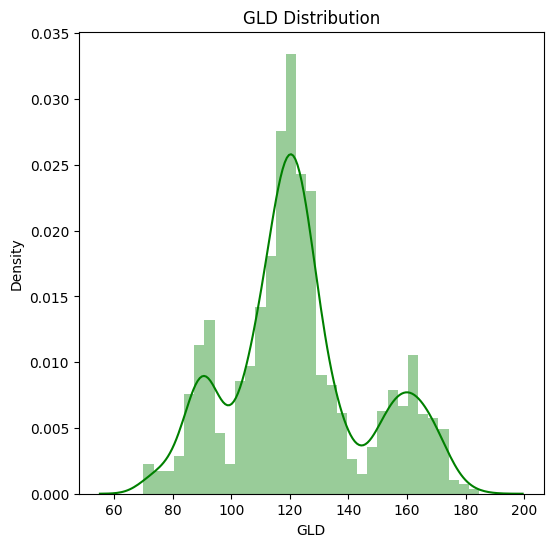

In [12]:
plt.figure(figsize=(6,6))
sns.distplot(df["GLD"],color="Green")
plt.title("GLD Distribution")
plt.show()

<ipython-input-13-29f089aa067e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["EUR/USD"],color="blue")


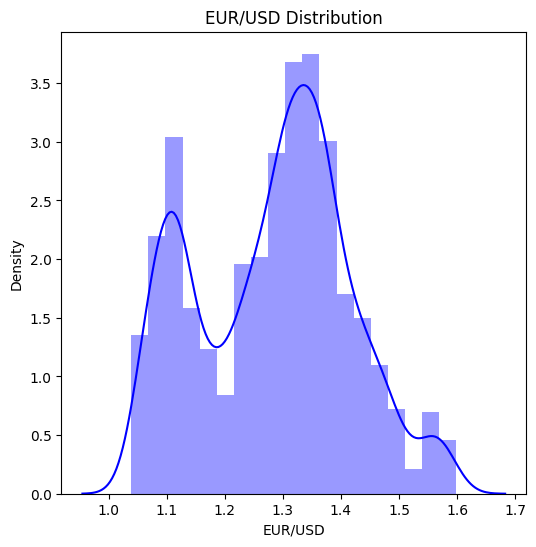

In [13]:
plt.figure(figsize=(6,6))
sns.distplot(df["EUR/USD"],color="blue")
plt.title("EUR/USD Distribution")
plt.show()

HEATMAP CORRELATION

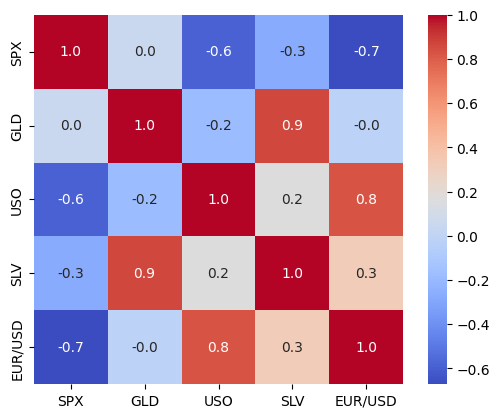

In [14]:
sns.heatmap(df1,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={"size":10},cmap="coolwarm")
plt.show()

In [15]:
# time series analysis:

df["Date"]= pd.to_datetime(df["Date"])
df["Year"] = df["Date"].dt.year
df["Month"] = df["Date"].dt.month
df["Month_name"] = df["Date"].dt.month_name()
df["Day"] = df["Date"].dt.day
df["Day_name"] = df["Date"].dt.day_name()
df["Week_of_Year"] = df["Date"].dt.isocalendar().week
df["Quarter"]=df["Date"].dt.quarter
df.set_index("Date",inplace = True)

df

,SPX,GLD,USO,SLV,EUR/USD,Year,Month,Month_name,Day,Day_name,Week_of_Year,Quarter
Date,,,,,,,,,,,,
2008-01-02,1447.160034,84.860001,78.470001,15.1800,1.471692,2008,1,January,2,Wednesday,1,1
2008-01-03,1447.160034,85.570000,78.370003,15.2850,1.474491,2008,1,January,3,Thursday,1,1
2008-01-04,1411.630005,85.129997,77.309998,15.1670,1.475492,2008,1,January,4,Friday,1,1
2008-01-07,1416.180054,84.769997,75.500000,15.0530,1.468299,2008,1,January,7,Monday,2,1
2008-01-08,1390.189941,86.779999,76.059998,15.5900,1.557099,2008,1,January,8,Tuesday,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2018-05-08,2671.919922,124.589996,14.060000,15.5100,1.186789,2018,5,May,8,Tuesday,19,2
2018-05-09,2697.790039,124.330002,14.370000,15.5300,1.184722,2018,5,May,9,Wednesday,19,2
2018-05-10,2723.070068,125.180000,14.410000,15.7400,1.191753,2018,5,May,10,Thursday,19,2


In [16]:
# Checking unique values

uniq_colvalues = ['Year','Month','Month_name','Day','Day_name','Week_of_Year','Quarter']

for column in uniq_colvalues:
    print(f"Unique values in {column}:  {df[column].unique()}\n")

Unique values in Year:  [2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018]

Unique values in Month:  [ 1  2  3  4  5  6  7  8  9 10 11 12]

Unique values in Month_name:  ['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']

Unique values in Day:  [ 2  3  4  7  8  9 10 11 14 15 16 17 18 22 23 24 25 28 29 30 31  1  5  6
 12 13 19 20 21 26 27]

Unique values in Day_name:  ['Wednesday' 'Thursday' 'Friday' 'Monday' 'Tuesday']

Unique values in Week_of_Year:  <IntegerArray>
[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40,
 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 33, 34, 53]
Length: 53, dtype: UInt32

Unique values in Quarter:  [1 2 3 4]



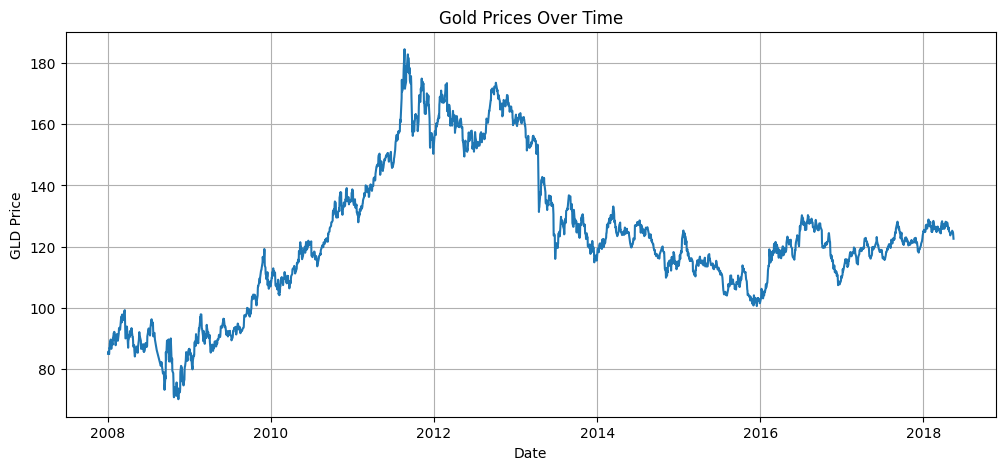

In [17]:
# Plot the time series

from statsmodels.tsa.stattools import adfuller

plt.figure(figsize=(12, 5))
plt.plot(df['GLD'])
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('GLD Price')
plt.grid(True)
plt.show()



MODEL TRAINING

In [18]:
# Train-test split
pred_rows = int(len(df)*0.8)

train = list(df[0:pred_rows]["GLD"])
test = list(df[pred_rows:]["GLD"])

print(len(train))
print(len(test))

1832
458


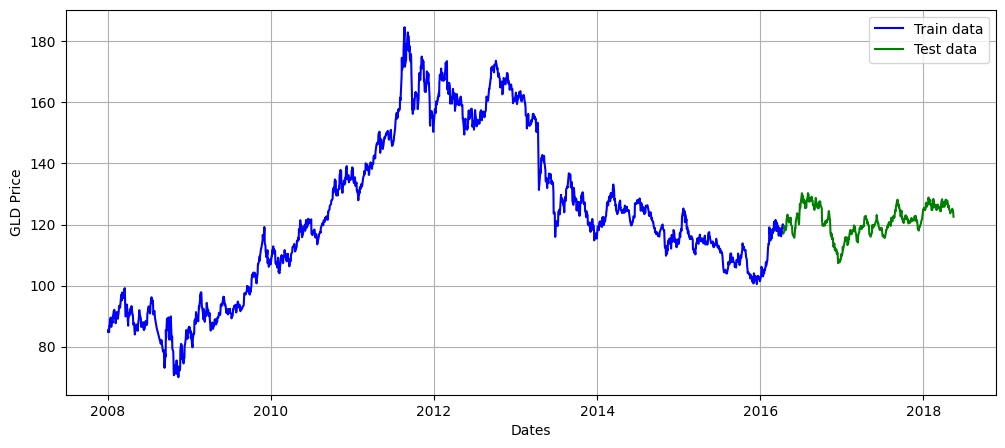

In [19]:
# plot train-test split

plt.figure(figsize=(12,5))
plt.grid(True)
plt.xlabel("Dates")
plt.ylabel("GLD Price")
plt.plot(df[0:pred_rows]["GLD"], "blue",label="Train data")
plt.plot(df[pred_rows:]["GLD"], "green",label="Test data")
plt.legend()

In [20]:
from statsmodels.tsa.arima.model import ARIMA

model_predictions = []
n_test_obs = len(test)

In [21]:
for i in range(n_test_obs):
    model = ARIMA(train, order = (2,1,2))
    model_fit = model.fit()
    pred = model_fit.forecast()
    y_pred = pred[0]
    model_predictions.append(y_pred)

    actual_test = test[i]
    train =np.append(train,actual_test)

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [22]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 2289
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -4224.114
Date:                Tue, 11 Jun 2024   AIC                           8458.227
Time:                        15:28:08   BIC                           8486.905
Sample:                             0   HQIC                          8468.685
                               - 2289                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3383      0.037    -36.417      0.000      -1.410      -1.266
ar.L2         -0.9098      0.034    -26.584      0.000      -0.977      -0.843
ma.L1          1.3173      0.035     37.144      0.000       1.248       1.387
ma.L2          0.9166      0.033     27.855      0.000       0.852       0.981
sigma2         2.3501      0.025     95.130      0.000       2.302       2.399
===================================================================================
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):             23057.26
Prob(Q):                              0.52   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                            -1.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

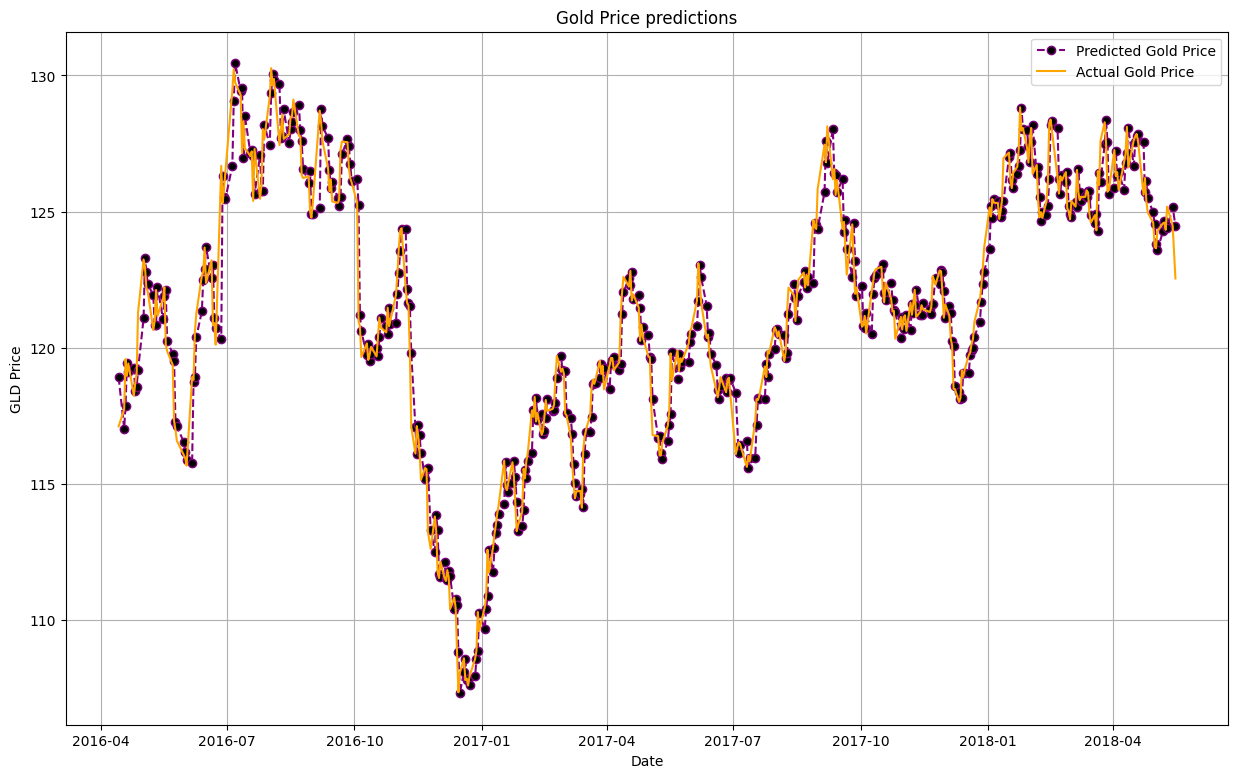

In [23]:
plt.figure(figsize = (15,9))
plt.grid(True)

date_range = df[pred_rows:].index

plt.plot(date_range, model_predictions, color  = "purple", marker = "o", linestyle = "dashed", markerfacecolor="black" ,label = "Predicted Gold Price")
plt.plot(date_range, test, color  = "orange", label = "Actual Gold Price")
plt.title("Gold Price predictions")
plt.xlabel("Date")
plt.ylabel("GLD Price")
plt.legend()
plt.show()

MODEL EVALUATION

In [24]:
# performance metrics

mape = np.mean(np.abs(np.array(model_predictions)-np.array(test))/np.abs(test))
print("MAPE:", mape)


MAPE: 0.0059808111775451174


In [25]:
# overall accuracy of test data

accuracy = 1 - mape
print("Accuracy:", accuracy)

Accuracy: 0.9940191888224549
